In [1]:
import xgboost as xgb
import pandas as pd

In [2]:
#상윤님이 보내주는 코드에 이어서 작성해야 함 불러오는 파일은 당연히 원본파일
df = pd.read_csv('../data_refine/refine_final.csv')

df

,LOT,Injection_Velocity_1,Injection_Velocity_2,Injection_Velocity_3,Spray_Time_1,Spray_Time_2,Humidity,Temperature,Casting_Pressure,Pressure_Increase_Time,TYPE
0,180102-021-0101,0.120,0.220,0.368,0.2,0.3,19.993,15.598,680,0.041,0
1,180102-021-0101,0.106,0.216,0.357,0.2,0.3,18.778,14.997,678,0.043,0
2,180102-021-0101,0.085,0.222,0.371,0.2,0.3,20.330,15.835,680,0.043,0
3,180102-021-0101,0.080,0.208,0.349,0.2,0.3,18.382,14.841,324,0.000,0
4,180102-021-0101,0.106,0.214,0.360,0.2,0.3,18.961,15.028,677,0.043,0
...,...,...,...,...,...,...,...,...,...,...,...
8626,180606-022-0101,0.192,0.292,0.408,0.2,0.3,40.344,30.042,341,0.000,2
8627,180606-022-0101,0.188,0.294,0.416,0.2,0.3,38.394,31.105,341,0.000,2
8628,180606-022-0101,0.194,0.294,0.411,0.2,0.3,35.061,31.599,341,0.000,2
8629,180606-022-0101,0.185,0.296,0.416,0.2,0.3,31.495,32.699,340,0.000,2


In [3]:
# 학습데이터 셋 분리

X = df.drop(columns = ['LOT', 'TYPE'])
Y = df[['TYPE']]

In [4]:
X

,Injection_Velocity_1,Injection_Velocity_2,Injection_Velocity_3,Spray_Time_1,Spray_Time_2,Humidity,Temperature,Casting_Pressure,Pressure_Increase_Time
0,0.120,0.220,0.368,0.2,0.3,19.993,15.598,680,0.041
1,0.106,0.216,0.357,0.2,0.3,18.778,14.997,678,0.043
2,0.085,0.222,0.371,0.2,0.3,20.330,15.835,680,0.043
3,0.080,0.208,0.349,0.2,0.3,18.382,14.841,324,0.000
4,0.106,0.214,0.360,0.2,0.3,18.961,15.028,677,0.043
...,...,...,...,...,...,...,...,...,...
8626,0.192,0.292,0.408,0.2,0.3,40.344,30.042,341,0.000
8627,0.188,0.294,0.416,0.2,0.3,38.394,31.105,341,0.000
8628,0.194,0.294,0.411,0.2,0.3,35.061,31.599,341,0.000
8629,0.185,0.296,0.416,0.2,0.3,31.495,32.699,340,0.000


In [5]:
Y

,TYPE
0,0
1,0
2,0
3,0
4,0
...,...
8626,2
8627,2
8628,2
8629,2


In [6]:
# 전처리 데이터 불러오기

X_smote = pd.read_csv('../data_refine/smote_IQR_X1.csv', index_col=0)
Y_smote = pd.read_csv('../data_refine/smote_IQR_Y1.csv', index_col=0)
X_zscore = pd.read_csv('../data_refine/smote_zscore_X1.csv', index_col=0)
Y_zscore = pd.read_csv('../data_refine/smote_zscore_Y1.csv', index_col=0)

In [7]:
X_smote

,Injection_Velocity_1,Injection_Velocity_2,Injection_Velocity_3,Spray_Time_1,Spray_Time_2,Humidity,Temperature,Casting_Pressure,Pressure_Increase_Time
0,0.120000,0.220000,0.368000,0.2,0.3,19.993000,15.598000,680,0.041000
1,0.106000,0.216000,0.357000,0.2,0.3,18.778000,14.997000,678,0.043000
2,0.085000,0.222000,0.371000,0.2,0.3,20.330000,15.835000,680,0.043000
3,0.080000,0.208000,0.349000,0.2,0.3,18.382000,14.841000,324,0.000000
4,0.106000,0.214000,0.360000,0.2,0.3,18.961000,15.028000,677,0.043000
...,...,...,...,...,...,...,...,...,...
16867,0.168920,0.276479,0.326920,0.1,0.2,7.987718,18.103146,680,0.040080
16868,0.180790,0.280698,0.334605,0.2,0.3,58.657474,13.135578,678,0.039046
16869,0.189361,0.287320,0.340320,0.2,0.3,11.063663,20.566343,680,0.040320
16870,0.174842,0.272561,0.326281,0.1,0.1,7.927421,19.875790,679,0.043140


In [8]:
X_zscore

,Injection_Velocity_1,Injection_Velocity_2,Injection_Velocity_3,Spray_Time_1,Spray_Time_2,Humidity,Temperature,Casting_Pressure,Pressure_Increase_Time
0,0.120000,0.220000,0.368000,0.200000,0.3,19.993000,15.598000,680,0.041000
1,0.106000,0.216000,0.357000,0.200000,0.3,18.778000,14.997000,678,0.043000
2,0.085000,0.222000,0.371000,0.200000,0.3,20.330000,15.835000,680,0.043000
3,0.080000,0.208000,0.349000,0.200000,0.3,18.382000,14.841000,324,0.000000
4,0.106000,0.214000,0.360000,0.200000,0.3,18.961000,15.028000,677,0.043000
...,...,...,...,...,...,...,...,...,...
16431,0.141072,0.330000,0.513855,0.100000,0.3,47.811746,20.240533,706,0.042155
16432,0.196113,0.281412,0.324000,0.200000,0.2,9.319690,17.402175,681,0.039294
16433,0.198450,0.286450,0.330450,0.100000,0.2,7.896000,18.243000,680,0.039887
16434,0.178536,0.280634,0.331415,0.131703,0.2,9.479303,17.431472,680,0.041317


In [9]:
# 원본데이터에 type 처리만한 데이터를 학습데이터로 변환
from sklearn.model_selection import train_test_split

tr_x, te_x, tr_y, te_y = \
    train_test_split(X, Y, test_size=0.3, random_state=1234)

In [10]:
# smote * zcore 처리한 데이터 학습데이터로 변환
from sklearn.model_selection import train_test_split

tr_zscore_x, te_zscore_x, tr_zscore_y, te_zscore_y = \
    train_test_split(X_zscore, Y_zscore, test_size=0.3, random_state=1234)

In [43]:
# 원본데이터에 type 처리만한 데이터를 학습데이터로 변환 (샘플링 층화 추출진행)
from sklearn.model_selection import train_test_split

tr_x_str, te_x_str, tr_y_str, te_y_str = \
    train_test_split(X, Y, test_size=0.3, random_state=1234, stratify = Y)

In [40]:
# smote * zcore 처리한 데이터 학습데이터로 변환 (샘플링 층화 추출진행)
from sklearn.model_selection import train_test_split

tr_zscore_x_str, te_zscore_x_str, tr_zscore_y_str, te_zscore_y_str = \
    train_test_split(X_zscore, Y_zscore, test_size=0.3, random_state=1234, stratify = Y_zscore)

## 1. random state 로 데이터 학습

#### 0. Default 설정값 (파라미터 조정 X)

In [24]:
from sklearn.metrics import mean_absolute_error, accuracy_score

# 학습 진행
xgb_class = xgb.XGBClassifier()
xgb_class.fit(tr_x, tr_y)

# 결과
prediction = xgb_class.predict(te_x)

# 성능 평가
print("Mean Absolute Error :" + str(mean_absolute_error(prediction, te_y)))
print("Accuracy Score :" + str(accuracy_score(prediction, te_y)) )

Mean Absolute Error :0.04633204633204633
Accuracy Score :0.977992277992278


In [26]:
from sklearn.metrics import mean_absolute_error, accuracy_score

# 학습 진행
xgb_class_zscore = xgb.XGBClassifier()
xgb_class_zscore.fit(tr_zscore_x, tr_zscore_y)

# 결과
prediction_zscore = xgb_class.predict(te_zscore_x)

# 성능 평가
print("Mean Absolute Error :" + str(mean_absolute_error(prediction_zscore, te_zscore_y)))
print("Accuracy Score :" + str(accuracy_score(prediction_zscore, te_zscore_y)) )

Mean Absolute Error :0.016832285540458326
Accuracy Score :0.9906712634354087


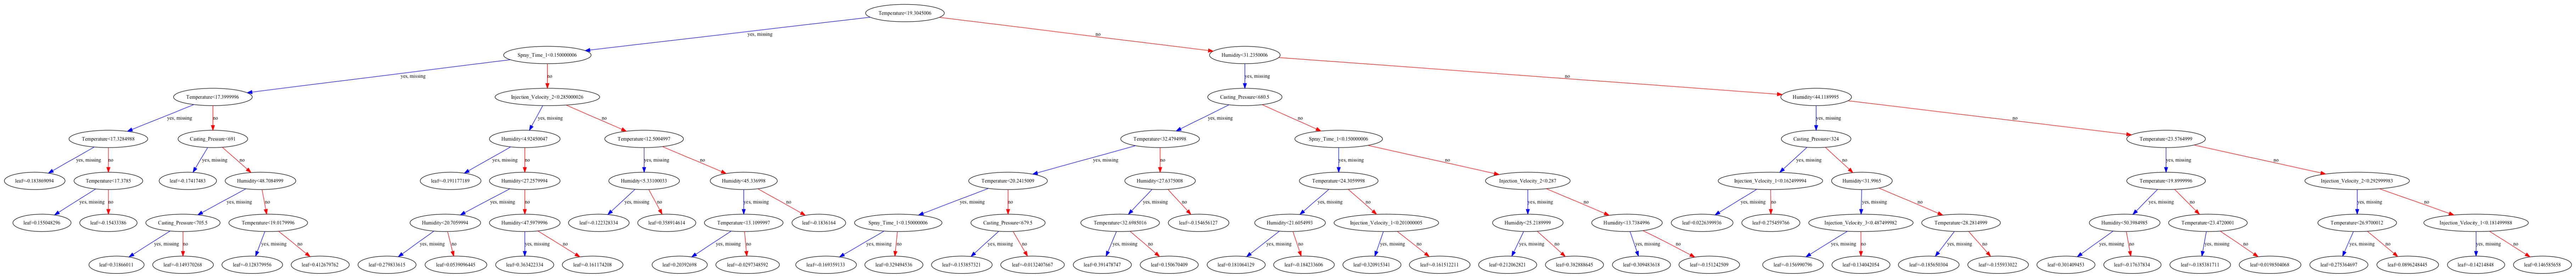

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(130, 200))
xgb.plot_tree(xgb_class, num_trees=4, ax=ax)
plt.show()

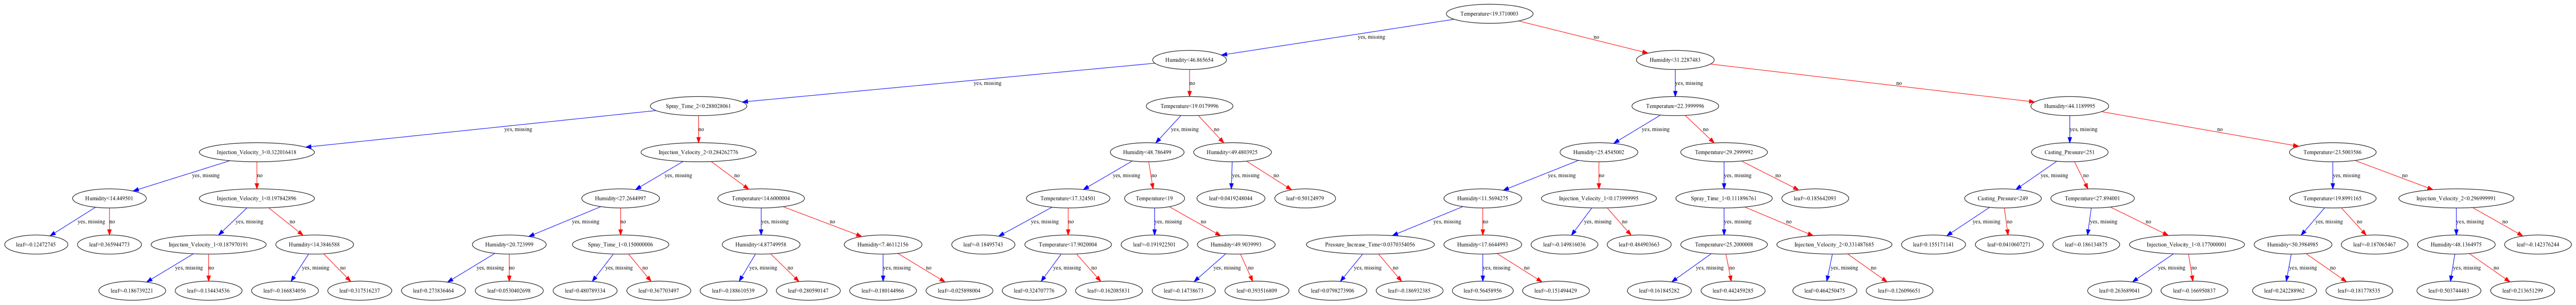

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(130, 200))
xgb.plot_tree(xgb_class_zscore, num_trees=4, ax=ax)
plt.show()

In [30]:
# 교차검증 진행
# 원본 데이터 + default XGB
from sklearn.model_selection import cross_val_score

score_xgb = cross_val_score(xgb_class, X, Y, cv = 5)
print('교차 검증 :'+ str(score_xgb))

교차 검증 :[0.56108859 0.66280417 0.56894554 0.33371958 0.50173812]


In [35]:
# 교차검증 진행
# zscore 전처리 데이터 + default XGB
from sklearn.model_selection import cross_val_score

score_xgb_zscore = cross_val_score(xgb_class_zscore, X, Y, cv = 5)
print('교차 검증 :'+ str(score_xgb))

교차 검증 :[0.55066589 0.58285052 0.50869061 0.36500579 0.48899189]


#### 1. 파라미터 조정(n_estimate 조정)
##### -> 깡통으로 학습시키니까 너무 오버피팅 양상을 보임
##### -> n_estimate : 트리모델 갯수 (default = 100)

In [33]:
from sklearn.metrics import mean_absolute_error, accuracy_score

# 학습 진행
xgb_class_1_zscore = xgb.XGBClassifier(max_depth = 3)
xgb_class_1_zscore.fit(tr_zscore_x, tr_zscore_y)

# 결과
prediction_1_zscore = xgb_class_1_zscore.predict(te_zscore_x)

# 성능 평가
print("Mean Absolute Error :" + str(mean_absolute_error(prediction_1_zscore, te_zscore_y)))
print("Accuracy Score :" + str(accuracy_score(prediction_1_zscore, te_zscore_y)) )

Mean Absolute Error :0.05171364834719124
Accuracy Score :0.9738389778949503


In [34]:
# 교차검증 진행
# 원본 데이터 + default XGB
from sklearn.model_selection import cross_val_score

score_xgb = cross_val_score(xgb_class_1_zscore, X, Y, cv = 5)
print('교차 검증 :'+ str(score_xgb))

교차 검증 :[0.55066589 0.58285052 0.50869061 0.36500579 0.48899189]


In [38]:
from sklearn.metrics import mean_absolute_error, accuracy_score

# 학습 진행
xgb_class_2_zscore = xgb.XGBClassifier(max_depth = 3, n_estimators = 200)
xgb_class_2_zscore.fit(tr_zscore_x, tr_zscore_y)

# 결과
prediction_2_zscore = xgb_class_2_zscore.predict(te_zscore_x)

# 성능 평가
print("Mean Absolute Error :" + str(mean_absolute_error(prediction_2_zscore, te_zscore_y)))
print("Accuracy Score :" + str(accuracy_score(prediction_2_zscore, te_zscore_y)) )

Mean Absolute Error :0.032244980734131005
Accuracy Score :0.9839789089434192


In [39]:
# 교차검증 진행
# 원본 데이터 + default XGB
from sklearn.model_selection import cross_val_score

score_2_xgb = cross_val_score(xgb_class_2_zscore, X, Y, cv = 5)
print('교차 검증 :'+ str(score_2_xgb))

교차 검증 :[0.56224667 0.64310545 0.51274623 0.38238702 0.51448436]


In [11]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [3,4,5], 'n_estimators' : [200, 300, 400]}

xgb = xgb.XGBClassifier()

gridCV = GridSearchCV(xgb, param_grid=parameters, cv = 5, refit = True)

gridCV.fit(X_zscore, Y_zscore)

score_df = pd.DataFrame(gridCV.cv_results_)

In [17]:
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.490445,0.139450,0.005872,0.000548,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.878041,0.909644,0.839063,0.817463,0.758747,0.840592,0.051781,9
1,2.281825,0.246787,0.008166,0.001040,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.886557,0.915424,0.844843,0.820505,0.758442,0.845154,0.054367,8
2,3.177035,0.224355,0.010669,0.001744,3,400,"{'max_depth': 3, 'n_estimators': 400}",0.888078,0.917554,0.853362,0.823243,0.759355,0.848318,0.054668,7
3,2.200096,0.201201,0.007742,0.000791,4,200,"{'max_depth': 4, 'n_estimators': 200}",0.887774,0.926377,0.854274,0.827198,0.758442,0.850813,0.056882,6
4,3.128750,0.236676,0.010207,0.001185,4,300,"{'max_depth': 4, 'n_estimators': 300}",0.887470,0.927898,0.874658,0.826590,0.759355,0.855194,0.057810,2
5,3.921298,0.218776,0.013643,0.001618,4,400,"{'max_depth': 4, 'n_estimators': 400}",0.890511,0.928810,0.877396,0.826590,0.758442,0.856350,0.058876,1
6,2.410129,0.236449,0.008315,0.000650,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.887774,0.925464,0.876179,0.826590,0.758138,0.854829,0.057753,4
7,3.334235,0.273981,0.011760,0.001506,5,300,"{'max_depth': 5, 'n_estimators': 300}",0.886861,0.923334,0.877700,0.827198,0.758138,0.854646,0.057192,5
8,4.243006,0.302266,0.013786,0.002576,5,400,"{'max_depth': 5, 'n_estimators': 400}",0.887470,0.927898,0.875266,0.825981,0.758138,0.854951,0.058315,3


In [18]:
score_df.to_csv('gridCV_result.csv')

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [3,4,5], 'n_estimators' : [200, 300, 400]}

xgb_origin = xgb.XGBClassifier()

gridCV_origin = GridSearchCV(xgb_origin, param_grid=parameters, cv = 5, refit = True)

gridCV_origin.fit(X, Y)

score_origin_df = pd.DataFrame(gridCV_origin.cv_results_)

In [13]:
score_origin_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.814595,0.249463,0.004425,0.000347,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.562247,0.643105,0.512746,0.382387,0.514484,0.522994,0.084753,3
1,1.141759,0.156604,0.005332,0.000362,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.573248,0.641367,0.511008,0.400348,0.517961,0.528786,0.079475,1
2,1.463791,0.278569,0.006145,0.000502,3,400,"{'max_depth': 3, 'n_estimators': 400}",0.582513,0.648320,0.501159,0.385863,0.517961,0.527163,0.087714,2
3,0.932642,0.101036,0.004995,0.000520,4,200,"{'max_depth': 4, 'n_estimators': 200}",0.563405,0.617034,0.542294,0.377752,0.506952,0.521487,0.080237,4
4,1.812826,0.199996,0.006586,0.000428,4,300,"{'max_depth': 4, 'n_estimators': 300}",0.568037,0.609502,0.530127,0.375435,0.507532,0.518127,0.079319,7
5,2.227061,0.421534,0.007426,0.000672,4,400,"{'max_depth': 4, 'n_estimators': 400}",0.571511,0.606605,0.535342,0.373696,0.507532,0.518937,0.079930,6
6,1.258305,0.219057,0.006073,0.000432,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.560510,0.598494,0.546350,0.392236,0.504056,0.520329,0.070815,5
7,1.711407,0.195006,0.006698,0.000597,5,300,"{'max_depth': 5, 'n_estimators': 300}",0.560510,0.593859,0.543453,0.375435,0.504056,0.515462,0.075758,8
8,2.325205,0.181409,0.008641,0.001297,5,400,"{'max_depth': 5, 'n_estimators': 400}",0.561668,0.585168,0.539397,0.360950,0.504635,0.510364,0.079282,9


In [15]:
score_origin_df.to_csv('gridCV_origin.csv')

In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [3,4,5], 'n_estimators' : [200, 300, 400]}

xgb_origin_split = xgb.XGBClassifier()

gridCV_origin_split = GridSearchCV(xgb_origin_split, param_grid=parameters, cv = 5, refit = True)

gridCV_origin_split.fit(tr_x, tr_y)

score_origin_split_df = pd.DataFrame(gridCV_origin_split.cv_results_)

In [13]:
score_origin_split_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.789463,0.112165,0.003939,0.000246,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.963606,0.962748,0.956126,0.959437,0.959437,0.960271,0.002677,9
1,0.843148,0.033781,0.004434,0.000204,3,300,"{'max_depth': 3, 'n_estimators': 300}",0.971050,0.968543,0.960265,0.967715,0.966060,0.966727,0.003610,8
2,1.241533,0.194163,0.005018,0.000343,3,400,"{'max_depth': 3, 'n_estimators': 400}",0.975186,0.970199,0.961093,0.970199,0.969371,0.969209,0.004552,7
3,0.846349,0.168423,0.004370,0.000321,4,200,"{'max_depth': 4, 'n_estimators': 200}",0.975186,0.973510,0.964404,0.971854,0.975166,0.972024,0.004004,5
4,1.162473,0.202399,0.005060,0.000175,4,300,"{'max_depth': 4, 'n_estimators': 300}",0.976013,0.972682,0.966060,0.971026,0.975993,0.972355,0.003691,3
5,1.584484,0.299038,0.006181,0.000387,4,400,"{'max_depth': 4, 'n_estimators': 400}",0.976840,0.973510,0.966060,0.971026,0.978477,0.973183,0.004402,2
6,0.885343,0.027501,0.004644,0.000137,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.971878,0.975166,0.966887,0.968543,0.975993,0.971693,0.003567,6
7,1.419162,0.234700,0.005700,0.000572,5,300,"{'max_depth': 5, 'n_estimators': 300}",0.972705,0.975993,0.966887,0.967715,0.977649,0.972190,0.004305,4
8,1.880591,0.191736,0.006829,0.000401,5,400,"{'max_depth': 5, 'n_estimators': 400}",0.974359,0.975993,0.967715,0.969371,0.979305,0.973349,0.004267,1


## 좋은 파라미터 값으로 학습 후, 모델 성능 결과 확인

In [45]:
from sklearn.model_selection import cross_val_score

# 학습 진행
xgb_class_3_zscore = xgb.XGBClassifier(max_depth =4, n_estimators = 400)
xgb_class_3_zscore.fit(tr_zscore_x, tr_zscore_y)

# 새로 추출한 검증데이터셋으로 교차검증 진행
score_3_xgb = cross_val_score(xgb_class_3_zscore, X_zscore, Y_zscore, cv = 5)
print('교차 검증 :'+ str(score_3_xgb))

교차 검증 :[0.89051095 0.92881047 0.8773958  0.8265896  0.75844235]


### https://www.kaggle.com/code/emmanuelfwerr/xgboost-multi-class-classification%C3%A5

## 모델에 대한 검증 결과

In [14]:
grid_zscore_scoreDF = pd.read_csv('./gridCV_result.csv')
grid_origin_scoreDF = pd.read_csv('./gridCV_origin.csv')

In [15]:
grid_zscore_scoreDF[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 3, 'n_estimators': 200}",0.840592,9
1,"{'max_depth': 3, 'n_estimators': 300}",0.845154,8
2,"{'max_depth': 3, 'n_estimators': 400}",0.848318,7
3,"{'max_depth': 4, 'n_estimators': 200}",0.850813,6
4,"{'max_depth': 4, 'n_estimators': 300}",0.855194,2
5,"{'max_depth': 4, 'n_estimators': 400}",0.856350,1
6,"{'max_depth': 5, 'n_estimators': 200}",0.854829,4
7,"{'max_depth': 5, 'n_estimators': 300}",0.854646,5
8,"{'max_depth': 5, 'n_estimators': 400}",0.854951,3


In [16]:
grid_origin_scoreDF[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 3, 'n_estimators': 200}",0.522994,3
1,"{'max_depth': 3, 'n_estimators': 300}",0.528786,1
2,"{'max_depth': 3, 'n_estimators': 400}",0.527163,2
3,"{'max_depth': 4, 'n_estimators': 200}",0.521487,4
4,"{'max_depth': 4, 'n_estimators': 300}",0.518127,7
5,"{'max_depth': 4, 'n_estimators': 400}",0.518937,6
6,"{'max_depth': 5, 'n_estimators': 200}",0.520329,5
7,"{'max_depth': 5, 'n_estimators': 300}",0.515462,8
8,"{'max_depth': 5, 'n_estimators': 400}",0.510364,9
